# Learning the topology of a Bayesian network from a database of cases using the K2 algorithm
### Advanced Statistics for Physical Analysis @ Physics of Data, UniPD - 29/7/2019
#### Chimenti Alberto, Frazzetto Paolo, Vincenzo Schimmenti
---

## Import and Update Packages

In [ ]:
# Install the required packages 

#install.packages('bnstruct', repo="https://cran.stat.unipd.it/")
#install.packages('bnlearn', repo="https://cran.stat.unipd.it/")

In [1]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install()

#BiocManager::install(c("graph", "Rgraphviz"))

In [2]:
#update.packages(ask = FALSE) # uncomment to update all

## Load Dataset

Load the basic dataset used in the handout _Illustration of the K2 Algorithm for Learning Bayes Net Structures_ by Prof. Carolina Ruiz.


In [3]:
df <- data.frame("x1" = factor(c(1,1,0,1,0,0,1,0,1,0)), "x2" = factor(c(0,1,0,1,0,1,1,0,1,0)), "x3" = factor(c(0,1,1,1,0,1,1,0,1,0)) ) # Ruiz's dataset
df

x1,x2,x3
<fct>,<fct>,<fct>
1,0,0
1,1,1
0,0,1
1,1,1
0,0,0
0,1,1
1,1,1
0,0,0
1,1,1


In [4]:
str(df)

'data.frame':	10 obs. of  3 variables:
 $ x1: Factor w/ 2 levels "0","1": 2 2 1 2 1 1 2 1 2 1
 $ x2: Factor w/ 2 levels "0","1": 1 2 1 2 1 2 2 1 2 1
 $ x3: Factor w/ 2 levels "0","1": 1 2 2 2 1 2 2 1 2 1


Alternatively, load the toy dataset _Asia_ contained in the _bnstruct_ library.
This dataset originally appeared in the paper _Local Computations with Probabilities on Graphical Structures and Their Application to Expert Systems_ by S. L. Lauritzen and D. J. Spiegelhalter (1988) and it addresses the following scenario:

>Shortness-of-breath (dyspnoea) may be due to tuberculosis, lung cancer or
 bronchitis, or none of them, or more than one of them. A recent visit to Asia
 increases the chances of tuberculosis, while smoking is known to be a risk factor
 for both lung cancer and bronchitis. The results of a single chest X-ray do not
 discriminate between lung cancer and tuberculosis, as neither does the presence
 or absence of dyspnoea.

The structure of our knowledge-base is represented by the below directed graph:
![title](Asia.png)

In [2]:
df <- asia() # loaded as BNDataset
bn.dataset <- asia() 
print(df)
layers <- c(1,2,1,2,2,3,4,4)


Dataset: 

num.variables 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2
num.items
10000
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0


In [7]:
raw.data(df)

V1,V2,V3,V4,V5,V6,V7,V8
2,2,1,1,1,2,1,2
2,1,1,1,1,1,2,1
1,1,2,1,1,1,2,1
2,1,2,1,1,1,2,1
2,1,2,1,1,1,1,2
2,1,2,1,1,1,2,2
2,1,2,1,1,1,2,2
2,1,2,1,1,1,1,2
2,1,2,1,1,1,1,2
2,1,2,1,1,1,2,1


In [3]:
# convert BNDataset as regular dataframe for bnlearn
df.bnlearn <- as.data.frame(raw.data(df))
cols <- variables(df)
colnames(df.bnlearn) <- cols
df.bnlearn <- data.frame(sapply(df.bnlearn, as.factor)) # convert integer to factor 
str(df.bnlearn)

'data.frame':	10000 obs. of  8 variables:
 $ Asia        : Factor w/ 2 levels "1","2": 2 2 1 2 2 2 2 2 2 2 ...
 $ Tubercolosys: Factor w/ 2 levels "1","2": 2 1 1 1 1 1 1 1 1 1 ...
 $ Smoke       : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 2 2 2 2 ...
 $ LungCancer  : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ Bronchitis  : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ Either      : Factor w/ 2 levels "1","2": 2 1 1 1 1 1 1 1 1 1 ...
 $ X.ray       : Factor w/ 2 levels "1","2": 1 2 2 2 1 2 2 1 1 2 ...
 $ Dyspnea     : Factor w/ 2 levels "1","2": 2 1 1 1 2 2 2 2 2 1 ...


#### Skimming the dataset

In [64]:
library(dplyr) 
library(ggplot2)
library(ggpubr)
theme_set(theme_pubclean())

Loading required package: magrittr


In [121]:
df.plot <- as.data.frame(apply(df.bnlearn,2, table))
df.plot <- stack(df.plot)
df.plot <- cbind(df.plot, rep(c(0,1),8))
df.plot <- df.plot[,c(2,3,1)]
colnames(df.plot) = c("Var","Value", "Freq")

'data.frame':	16 obs. of  3 variables:
 $ Var  : Factor w/ 8 levels "Asia","Tubercolosys",..: 1 1 2 2 3 3 4 4 5 5 ...
 $ Value: num  0 1 0 1 0 1 0 1 0 1 ...
 $ Freq : int  4953 5047 9438 562 5419 4581 9908 92 9884 116 ...


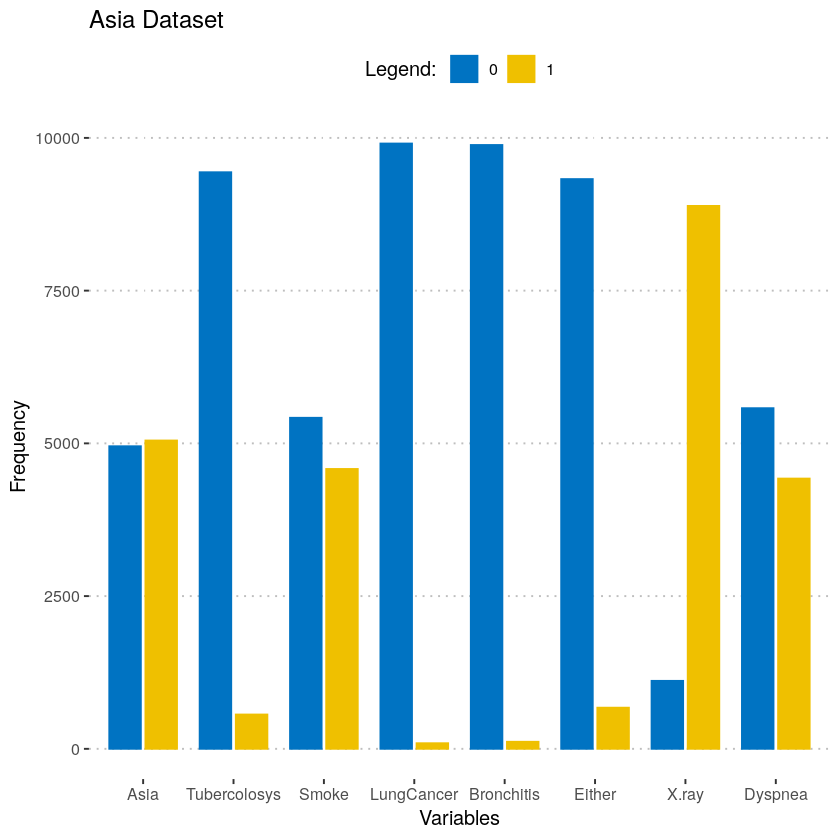

In [135]:
plot <- ggplot(df.plot, aes(x = Var, y = Freq)) +
        geom_col(aes(color = factor(Value), fill = factor(Value)), position = position_dodge(0.8), width = 0.7) +
        scale_color_manual("Legend:",values = c("#0073C2FF", "#EFC000FF")) +  scale_fill_manual("Legend:",values = c("#0073C2FF", "#EFC000FF")) + 
        labs(x = "Variables", y = "Frequency", title = "Asia Dataset")
plot

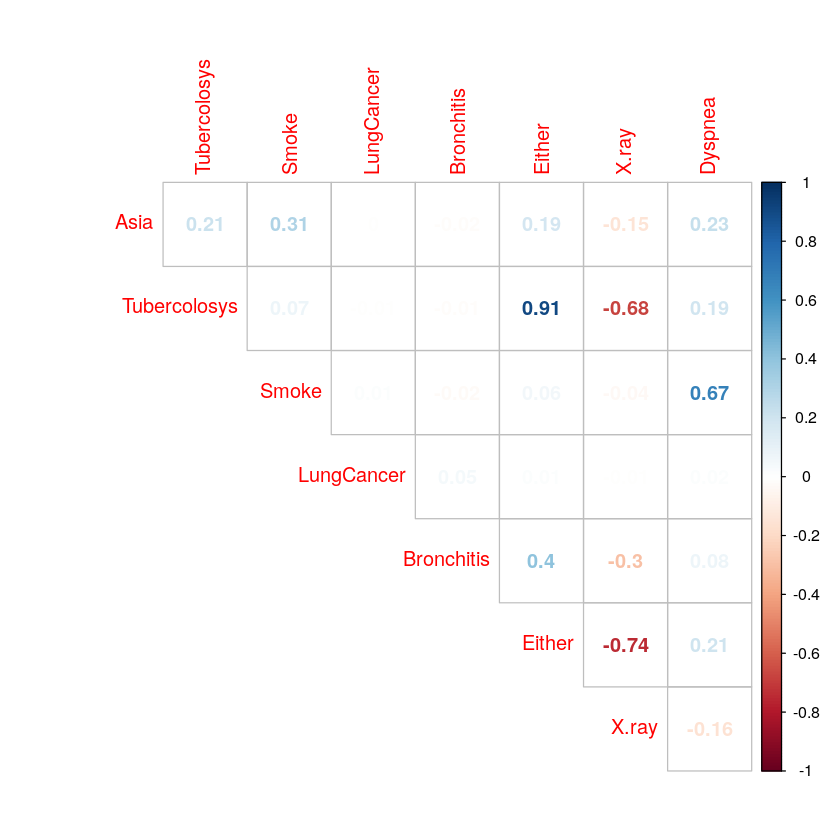

In [150]:
library('corrplot')
df.corr <- data.frame(sapply(df.bnlearn, as.integer))-1
corrplot(cor(df.corr), method='number', type='upper', diag = FALSE)

##  `bnstruct`

In [1]:
library("bnstruct")

Loading required package: bitops
Loading required package: Matrix
Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [9]:
citation("bnstruct")


To cite the bnstruct package in publications, use:

  Alberto Franzin, Francesco Sambo, Barbara di Camillo. bnstruct: an R
  package for Bayesian Network structure learning in the presence of
  missing data. Bioinformatics, 2017; 33 (8): 1250-1252, Oxford
  University Press

A BibTeX entry for LaTeX users is

  @Article{,
    title = {bnstruct: an R package for Bayesian Network structure learning in the presence of missing data},
    author = {Alberto Franzin and Francesco Sambo and Barbara di Camillo},
    journal = {Bioinformatics},
    year = {2017},
    volume = {33},
    number = {8},
    pages = {1250--1252},
    doi = {10.1093/bioinformatics/btw807},
    publisher = {Oxford University Press},
  }


In [10]:
# ---- PREPROCESSING the Ruiz's dataset ----
# The values contained in the dataset have to be numeric (real for continuous variables, integer for discrete ones)

#df <- as.data.frame(lapply(df, as.integer))
#str(df)
#bn.dataset <- BNDataset(data = df.integer, node.sizes = rep(2,length(df.integer)), discreteness =  rep('d',length(df.integer)), variables = colnames(df))
#show(bn.dataset)
#raw.data(bn.dataset)

In [11]:
# Network Learning
net.1 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "mmhc") # Max Min Hill Climbing (default)
net.2 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "mmpc") # Max-Min Parent-and-Children 
net.3 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "hc",   # Hill Climbing
                       scoring.func = "BDeu") # Bayesian-Dirichlet equivalent uniform (default)
net.4 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "hc",   # Hill Climbing
                       scoring.func = "AIC") # Akaike Information Criterion
net.5 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "hc",   # Hill Climbing
                       scoring.func = "BIC") # Bayesian Information Criterion
net.6 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "sm",   #  Silander-Myllymaki (exact search-and-score algorithm)
                        ) 

bnstruct :: learning the structure using MMHC ...
bnstruct :: learning using MMHC completed.
bnstruct :: learning network parameters ... 


node  1 
node  2 
node  3 
node  4 
node  5 
node  6 
node  7 
node  8 


bnstruct :: parameter learning done.
bnstruct :: MMPC uses 'max.fanin', but apparently you set 'max.parents', changing accordingly.
bnstruct :: learning the structure using MMPC ...
bnstruct :: learning using MMPC completed.
bnstruct :: HC uses 'max.fanin' and 'layer.struct' parameters, but apparently you set 'max.parents' and 'max.parents.layers', changing accordingly.
bnstruct :: learning the structure using HC ...
bnstruct :: learning using HC completed.
bnstruct :: learning network parameters ... 


node  1 
node  2 
node  3 
node  4 
node  5 
node  6 
node  7 
node  8 


bnstruct :: parameter learning done.
bnstruct :: HC uses 'max.fanin' and 'layer.struct' parameters, but apparently you set 'max.parents' and 'max.parents.layers', changing accordingly.
bnstruct :: learning the structure using HC ...
bnstruct :: learning using HC completed.
bnstruct :: learning network parameters ... 


node  1 
node  2 
node  3 
node  4 
node  5 
node  6 
node  7 
node  8 


bnstruct :: parameter learning done.
bnstruct :: HC uses 'max.fanin' and 'layer.struct' parameters, but apparently you set 'max.parents' and 'max.parents.layers', changing accordingly.
bnstruct :: learning the structure using HC ...
bnstruct :: learning using HC completed.
bnstruct :: learning network parameters ... 


node  1 
node  2 
node  3 
node  4 
node  5 
node  6 
node  7 
node  8 


bnstruct :: parameter learning done.
bnstruct :: learning the structure using SM ...
bnstruct :: learning using SM completed.
bnstruct :: learning network parameters ... 


node  1 
node  2 
node  3 
node  4 
node  5 
node  6 
node  7 
node  8 


bnstruct :: parameter learning done.


Copiato da documentazione: In terms of solution quality, the results clearly improve as the size of the
dataset grows. For 10000 observations BDeu finds slightly better networks, in
terms of similarity with the original one, than BIC, while for smaller datasets
BIC is significantly more robust.

In [ ]:
dag(net.1) # Show Directed Acyclic Graph adjagency matrix

In [ ]:
cpts(net.1) # show conditional probability tables 

In [ ]:
print(net.1)

In [ ]:
plot(net.1)

In [ ]:
plot(net.2)

In [ ]:
plot(net.3)

In [ ]:
plot(net.4)

In [ ]:
plot(net.5)

In [ ]:
plot(net.6) # almost! smoking -> lung cancer & bronchitis

In [ ]:
# bootstrap example taken from documentation, almost as wanted!
bn.boot <- bootstrap(bn.dataset, num.boots = 300)
net <- learn.network(bn.boot, bootstrap = TRUE, max.parents = 2, layering = layers, algo = "sm")
plot(net)

In [ ]:
wpdag(net)

In [12]:
actual.net <- matrix(c(0,1,0,0,0,0,0,0,
                       0,0,0,0,0,1,0,0,
                       0,0,0,1,1,0,0,0,
                       0,0,0,0,0,1,0,0,
                       0,0,0,0,0,0,0,1,
                       0,0,0,0,0,0,1,1,
                       0,0,0,0,0,0,0,0,
                       0,0,0,0,0,0,0,0), nrow = 8, ncol = 8, byrow = TRUE) # actual adjacency matrix 

In [ ]:
net.final <- learn.network(bn.dataset, initial.network = actual.net, max.parents = 2, layering = layers)
plot(net.final)

## `bnlearn`

In [4]:
library("bnlearn")
#library("Rgraphviz")


Attaching package: ‘bnlearn’

The following objects are masked from ‘package:bnstruct’:

    impute, read.bif, read.dsc, read.net, shd, write.dsc

The following objects are masked from ‘package:igraph’:

    compare, degree, path, subgraph

The following object is masked from ‘package:stats’:

    sigma



In [5]:
citation("bnlearn")


To cite bnlearn in publications use the most appropriate among:

A teaching book about Bayesian networks based on bnlearn:

  Marco Scutari, Jean-Baptiste Denis. (2014) Bayesian Networks with
  Examples in R. Chapman and Hall, Boca Raton. ISBN 978-1-4822-2558-7.

To cite applications of Bayesian networks in genetics and systems
biology you may want to use:

  Radhakrishnan Nagarajan, Marco Scutari, Sophie Lebre. (2013) Bayesian
  Networks in R with Applications in Systems Biology. Springer, New
  York. ISBN 978-1-4614-6445-7.

To cite parallel computing for bnlearn in publications use:

  Marco Scutari (2017). Bayesian Network Constraint-Based Structure
  Learning Algorithms: Parallel and Optimized Implementations in the
  bnlearn R Package. Journal of Statistical Software, 77(2), 1-20.
  doi:10.18637/jss.v077.i02

To cite general use of bnlearn in publications use:

  Marco Scutari (2010). Learning Bayesian Networks with the bnlearn R
  Package. Journal of Statistical Software, 35(3)

In [6]:
bn.k2 <- hc(df.bnlearn, score = "k2") # learn network structure with K2 algorithm
bn.k2


  Bayesian network learned via Score-based methods

  model:
   [Tubercolosys][LungCancer][Bronchitis|LungCancer]
   [Either|Tubercolosys:Bronchitis][Dyspnea|Tubercolosys:Bronchitis]
   [Smoke|Tubercolosys:Bronchitis:Dyspnea][X.ray|Either]
   [Asia|Tubercolosys:Smoke]
  nodes:                                 8 
  arcs:                                  11 
    undirected arcs:                     0 
    directed arcs:                       11 
  average markov blanket size:           3.00 
  average neighbourhood size:            2.75 
  average branching factor:              1.38 

  learning algorithm:                    Hill-Climbing 
  score:                                 Cooper & Herskovits' K2 
  tests used in the learning procedure:  175 
  optimized:                             TRUE 


Loading required namespace: Rgraphviz


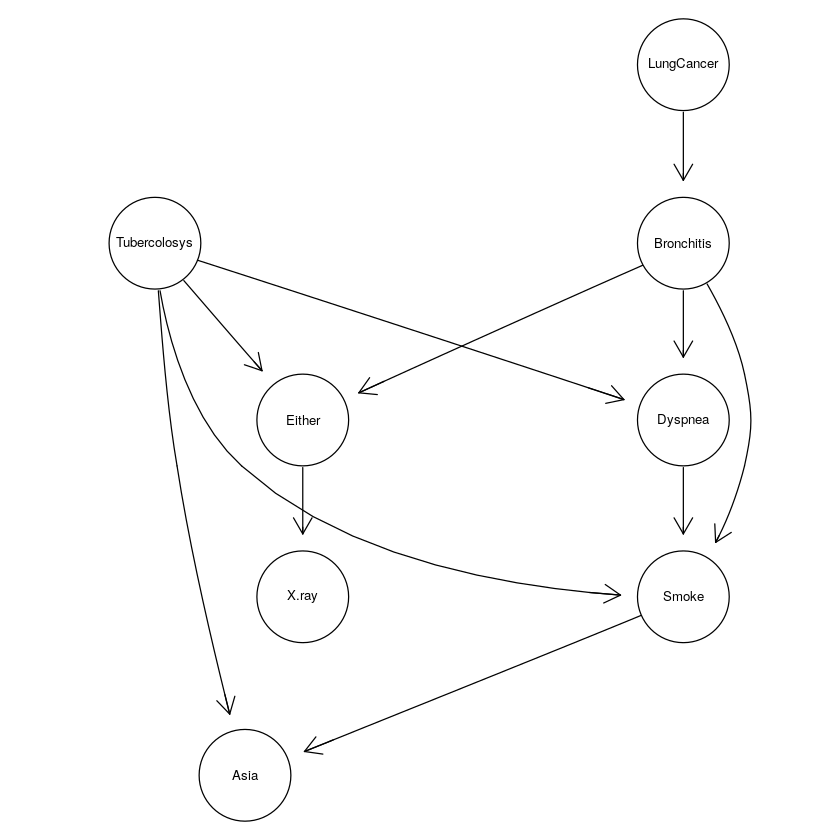

In [7]:
graphviz.plot(bn.k2)

In [8]:
bn.aic <- hc(df.bnlearn, score = "aic")
compare(bn.aic, bn.k2)

$tp
[1] 4

$fp
[1] 7

$fn
[1] 7

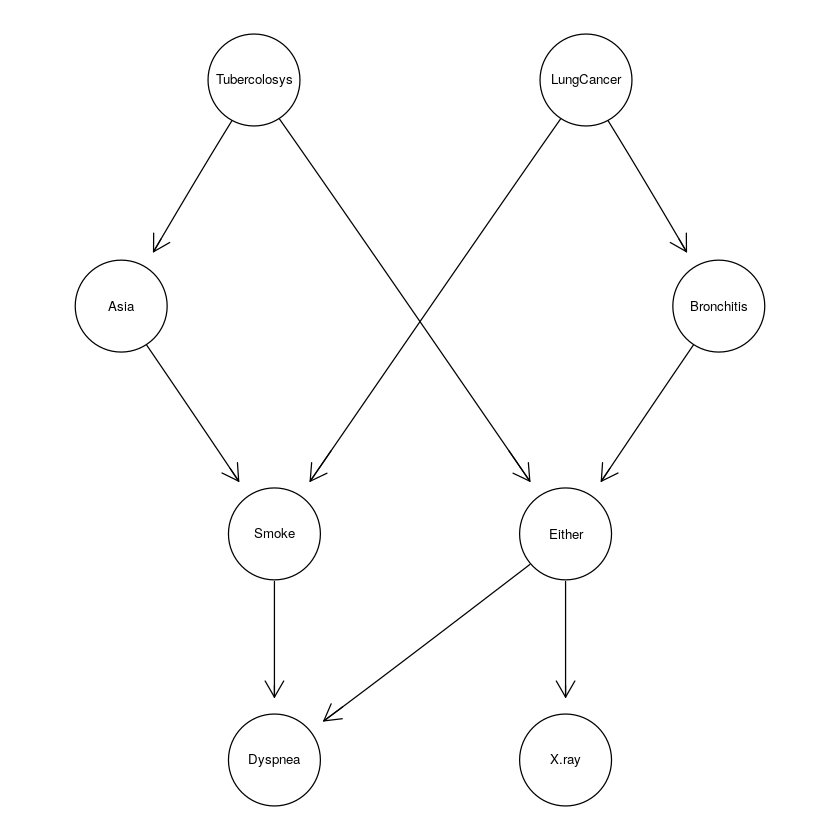

In [9]:
bn.tabu <- tabu(df.bnlearn, score = "k2")
graphviz.plot(bn.tabu)

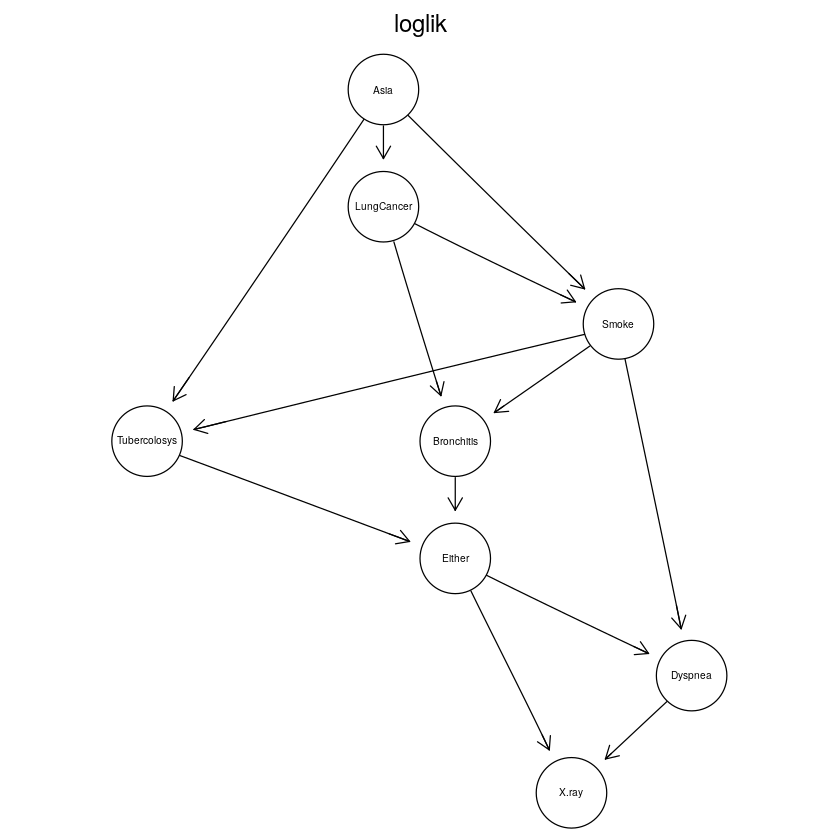

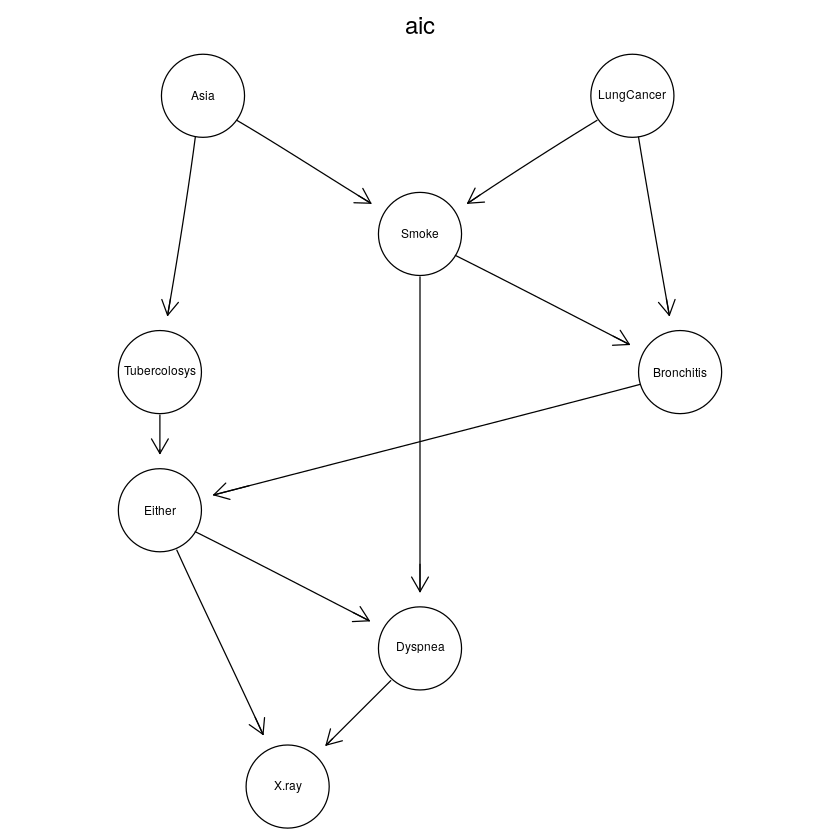

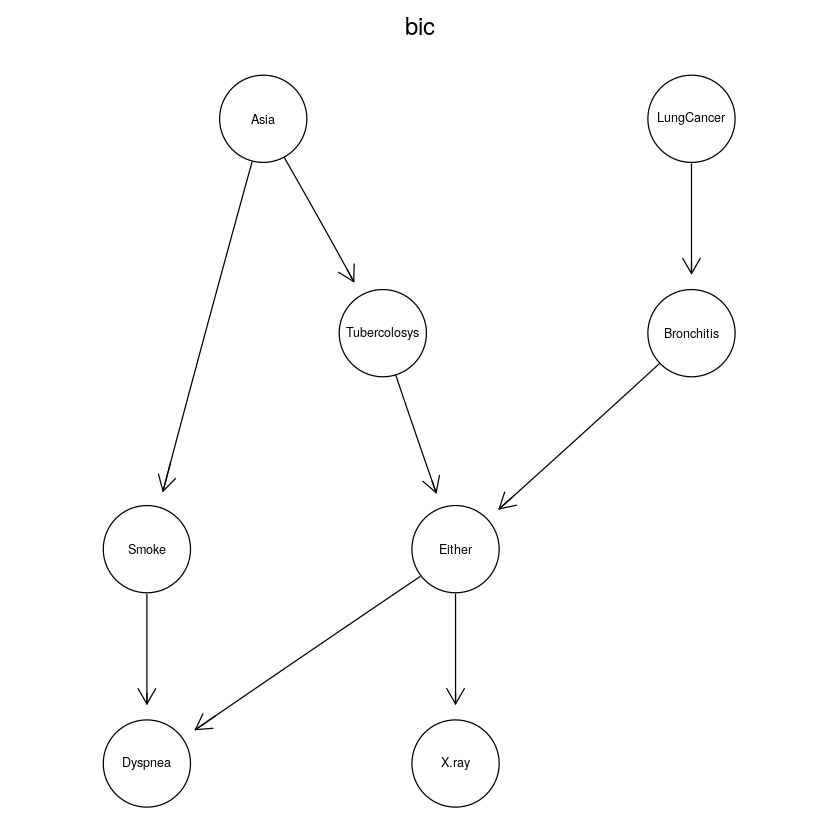

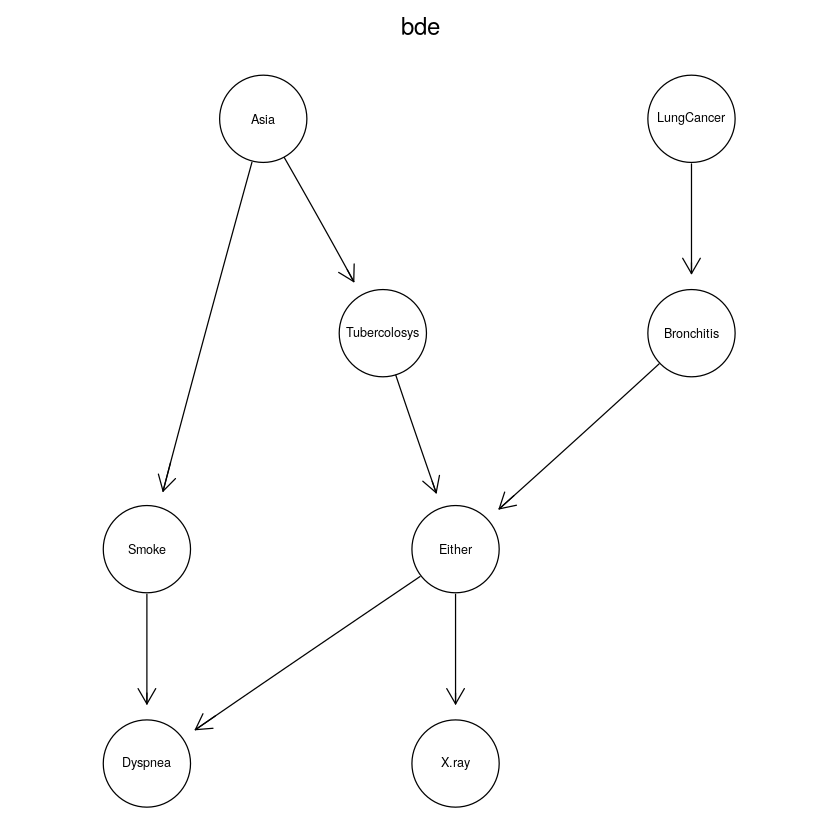

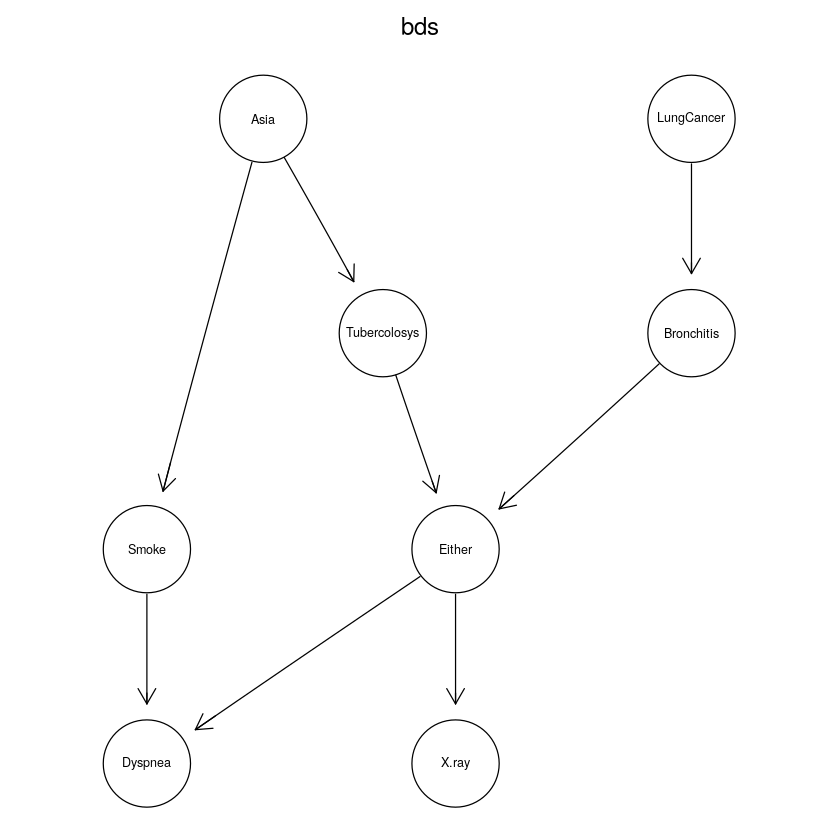

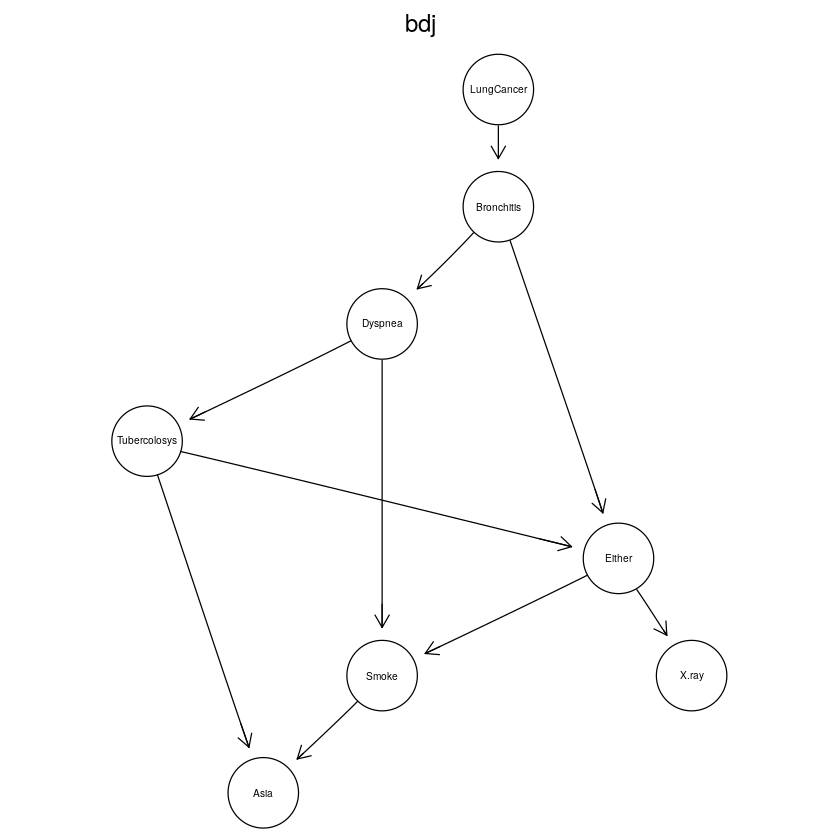

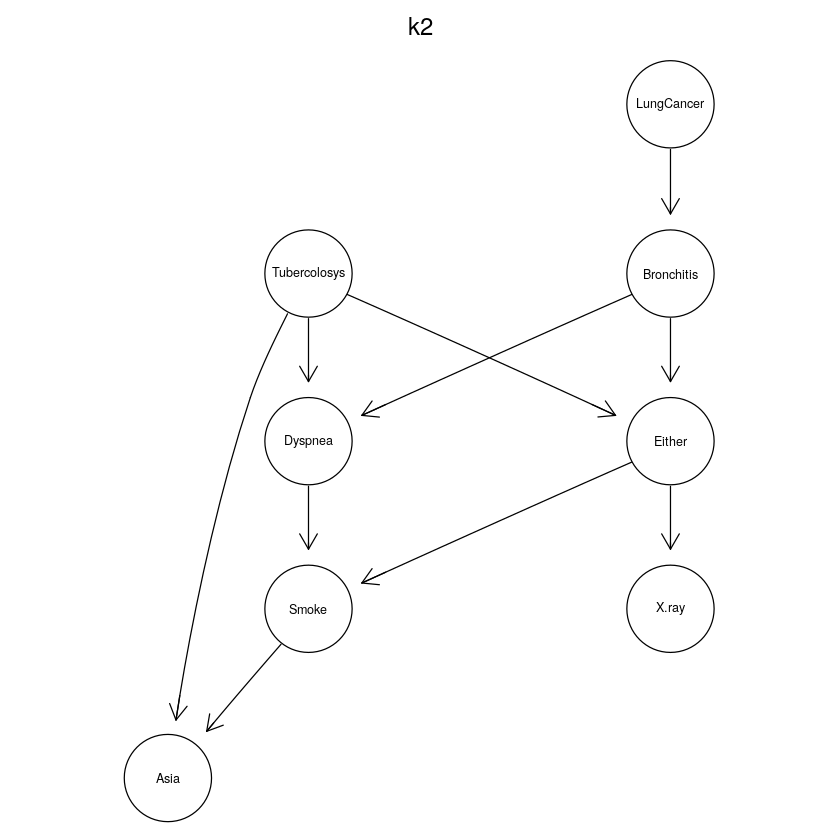

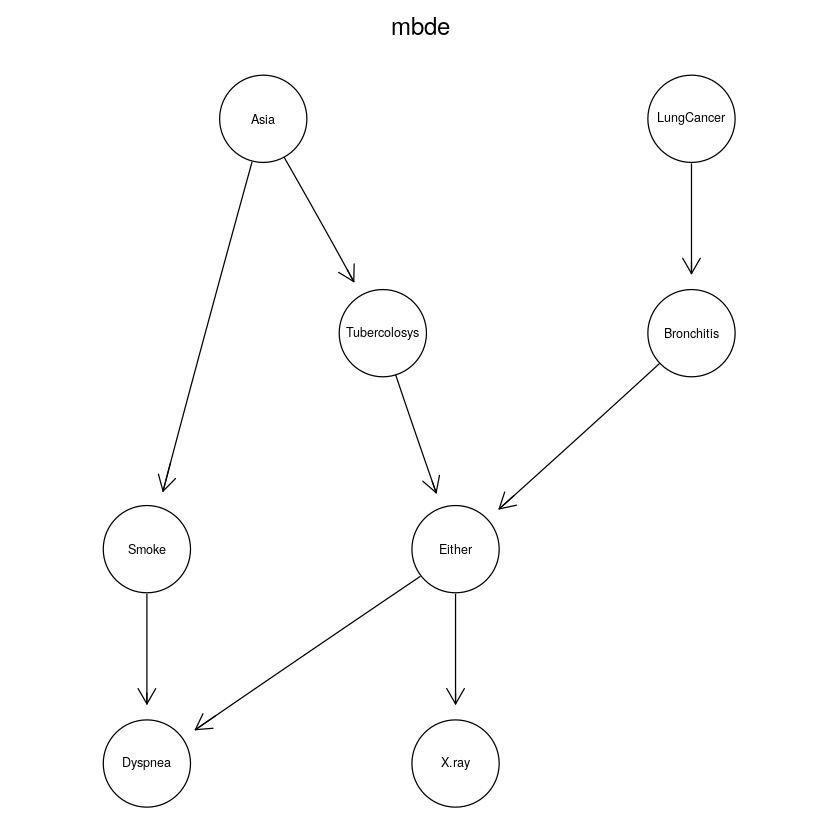

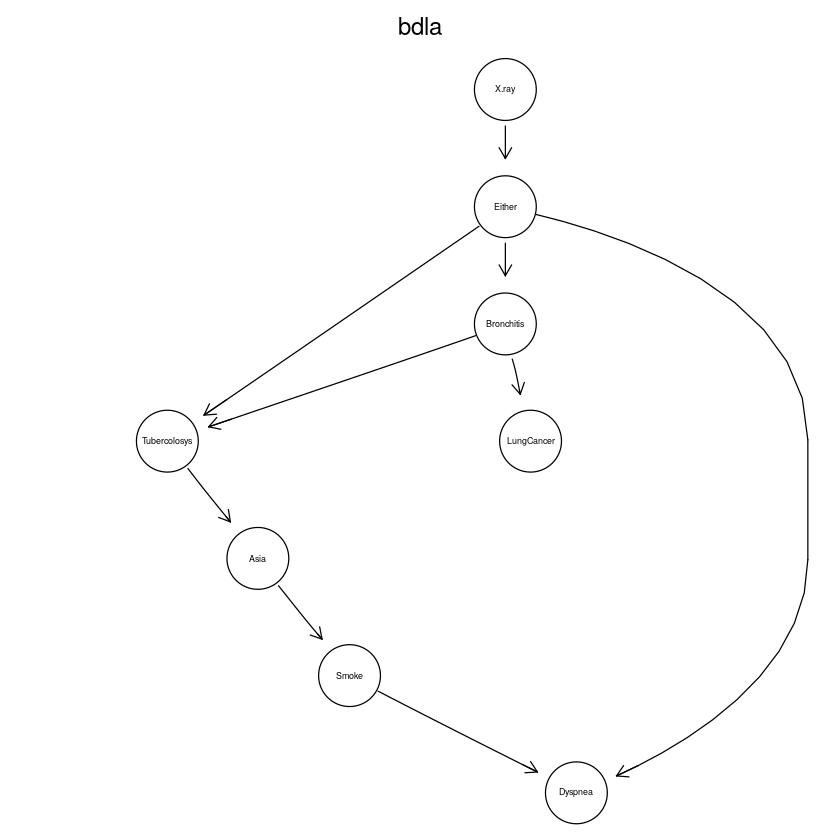

In [10]:
for (i in c("loglik","aic","bic","bde","bds","bdj","k2","mbde","bdla")) {
    graphviz.plot(hc(df.bnlearn, score = i, maxp = 2), main = i)
}

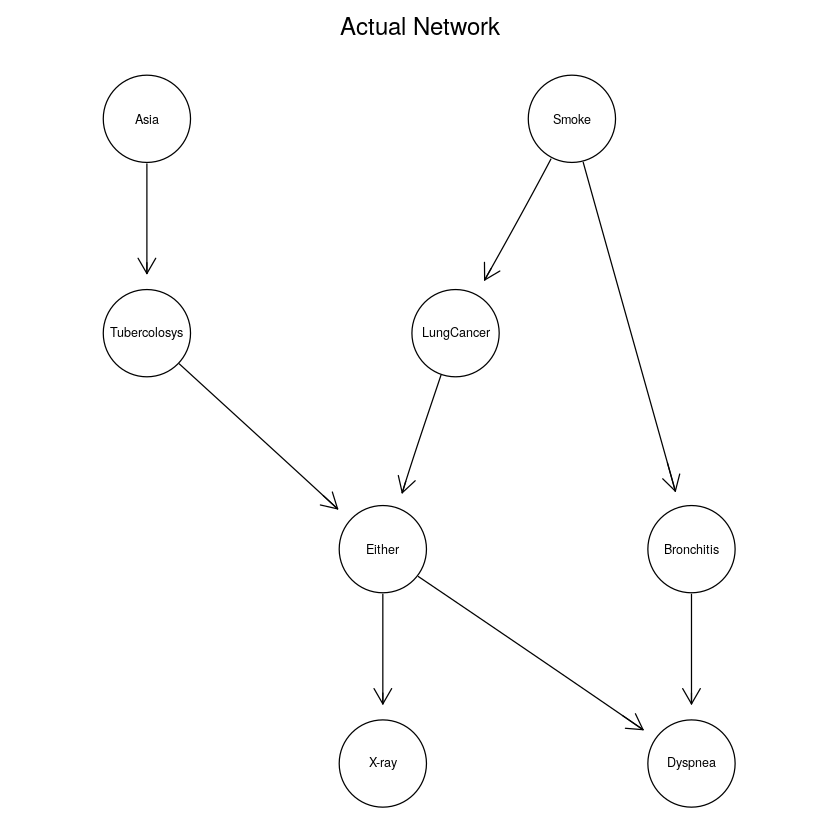

In [13]:
e = empty.graph(cols)
amat(e) = actual.net
graphviz.plot(e, main = "Actual Network")

In [14]:
learned.hc <- hc(df.bnlearn, score = "k2", maxp = 2, start = e)
graphviz.plot(learned.hc, main = "k2")

ERROR: Error in check.bn.vs.data(start, x): the variables in the data and in the network do not match.


## `Rcpp`

In [22]:
library('Rcpp')
library(bnstruct)
library(bnlearn)

In [23]:
cmpRes <- sourceCpp("rk2alg.cpp")
cmpRes

$functions
[1] "compute_instance_index" "compute_alpha"          "k2procedure"           
[4] "conditionalProb"       

$modules
character(0)

$cppSourcePath
[1] "/home/vicio/Scrivania/Exam/rk2alg.cpp"

$buildDirectory
[1] "/tmp/RtmpnwPW5h/sourceCpp-x86_64-pc-linux-gnu-1.0.1/sourcecpp_6922337e072e"

In [24]:
X <- as.matrix(asia)
n <- dim(X)[2]
m <- dim(X)[1]
X[X=='yes']=1
X[X=='no']=0
X<-matrix(as.integer(as.character(X)), m, n)
order <- c(0,2,1,3,4,5,6,7) # 0Asia 1Tubercolosys 2Smoke 3LungCancer 4Bronchitis 5Either 6X-ray 7Dyspnea
r <- rep(2, 8)
X_train <- X[sample(m,100),]
res <- k2procedure(X,r,order, returnType=1, verbose=0,u=2,splitSize=50)
res

,x0,x1,x2,x3,x4,x5,x6,x7
x0,0,0,0,1,0,1,1,0
x1,0,0,0,0,1,0,0,0
x2,0,0,0,1,0,0,1,1
x3,0,0,0,0,0,1,0,0
x4,0,0,0,0,0,0,0,1
x5,0,0,0,0,0,0,0,0
x6,0,0,0,0,0,0,0,0
x7,0,0,0,0,0,0,0,0


In [38]:
res.adj <- unname(res)

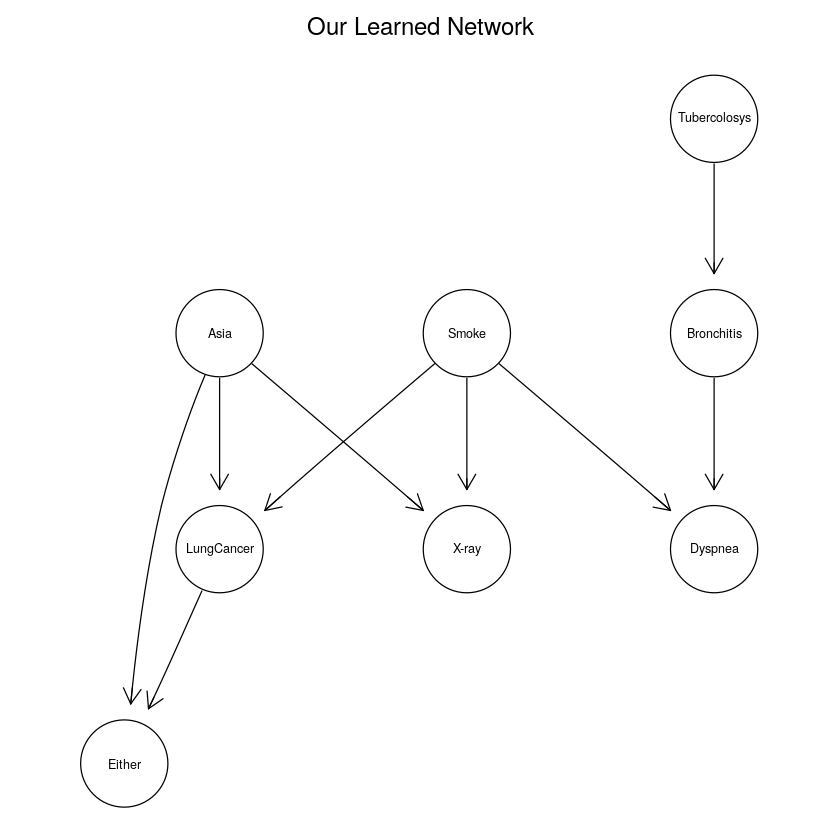

In [39]:
our.net = empty.graph(cols)
amat(our.net) = res.adj
graphviz.plot(our.net, main = "Our Learned Network")

In [ ]:
df <- data.frame(X)
df <- data.frame(sapply(df, as.factor))
n <- dim(X)[2]



blistLen <- (n-1)*(n-2)/2
fList <- character(blistLen)
tList <- character(blistLen)
count = 1
for(i in 1:(length(order)-1))
{
    var <- order[i]+1
    for(j in (i+1):length(order))
    {
        jvar <- order[j] + 1
        fList[count] = colnames(df)[jvar]
        tList[count] = colnames(df)[var]
        count = count + 1
    }
}
blist <- cbind(fList,tList)
colnames(blist) <- c('from','to')



res <- hc(df, blacklist=blist, score='k2')
plot(res)
res